In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.0,1.0,1,1.0,0.0,0,0.0,2,2,...,0,0.0,0,0.0,0.0,0.0,0,0,2,0
1,1,1.0,2.0,0,0.0,0.0,3,0.0,3,0,...,0,0.0,0,0.0,0.0,2.0,2,2,0,7
2,2,2.0,1.0,0,NaN,0.0,3,0.0,2,0,...,0,0.0,0,2.0,0.0,3.0,3,2,0,7
3,2,2.0,2.0,1,0.0,0.0,2,0.0,2,2,...,0,0.0,0,2.0,0.0,2.0,2,2,0,7
4,2,2.0,1.0,0,0.0,0.0,2,0.0,2,0,...,0,0.0,0,NaN,0.0,2.0,2,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.0,0.0,2,1.0,0.0,0,0.0,0,0,...,0,0.0,0,NaN,0.0,0.0,0,3,0,70
354,2,3.0,2.0,0,0.0,0.0,0,0.0,3,2,...,0,0.0,0,0.0,0.0,NaN,0,1,0,70
355,2,2.0,2.0,1,NaN,0.0,0,0.0,0,0,...,0,0.0,0,2.0,0.0,0.0,0,2,0,70
356,2,1.0,0.0,3,0.0,0.0,0,0.0,0,0,...,0,0.0,0,0.0,0.0,NaN,0,1,0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	19
float64		column 3	36
int64		column 4	0
float64		column 5	37
float64		column 6	37
int64		column 7	0
float64		column 8	18
int64		column 9	0
int64		column 10	0
float64		column 11	18
float64		column 12	18
int64		column 13	0
float64		column 14	19
float64		column 15	37
float64		column 16	18
float64		column 17	37
int64		column 18	0
float64		column 19	36
float64		column 20	18
int64		column 21	0
float64		column 22	37
float64		column 23	18
float64		column 24	18
int64		column 25	0
float64		column 26	19
int64		column 27	0
float64		column 28	54
float64		column 29	54
float64		column 30	36
int64		column 31	0
int64		column 32	0
int64		column 33	0
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,339.000000,322.000000,358.000000,321.000000,321.000000,358.000000,340.000000,358.000000,358.000000,...,358.000000,339.000000,358.000000,304.000000,304.000000,322.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.808260,1.562112,1.354749,0.604361,0.404984,0.170391,0.332353,0.622905,0.530726,...,0.399441,0.469027,0.460894,0.957237,0.398026,0.093168,0.117318,1.877095,0.558659,36.296089
std,0.664865,0.693454,0.877652,1.135062,0.874560,0.917456,0.576394,0.789765,0.990278,0.912352,...,0.856479,0.860756,0.959914,1.111660,0.924258,0.414702,0.493863,0.699324,1.107990,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

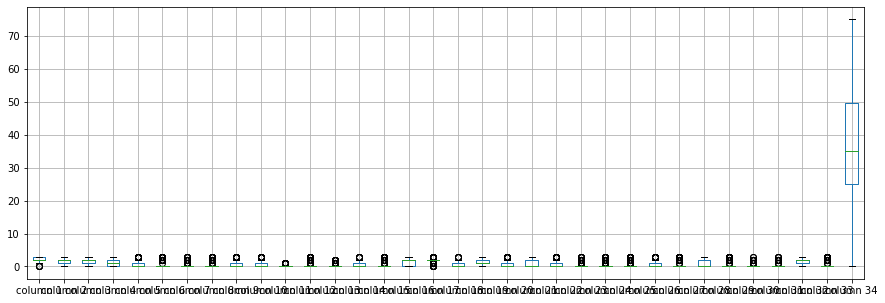

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.808260
column 3      1.562112
column 4      1.354749
column 5      0.604361
column 6      0.404984
column 7      0.170391
column 8      0.332353
column 9      0.622905
column 10     0.530726
column 11     0.126471
column 12     0.411765
column 13     0.142458
column 14     0.530973
column 15     0.274143
column 16     1.370588
column 17     1.965732
column 18     0.511173
column 19     1.263975
column 20     0.626471
column 21     0.983240
column 22     0.613707
column 23     0.285294
column 24     0.352941
column 25     0.399441
column 26     0.469027
column 27     0.460894
column 28     0.957237
column 29     0.398026
column 30     0.093168
column 31     0.117318
column 32     1.877095
column 33     0.558659
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.425604,0.245535,-0.033157,-0.004806,0.054574,-0.115275,-0.031260,0.138519,0.180740,...,-0.020583,0.134954,-0.003972,0.027834,0.010654,-0.044225,0.006100,0.093026,-0.013850,-0.005028
column 2,0.425604,1.000000,0.352208,-0.073524,-0.032815,-0.050361,-0.103274,-0.078402,0.282935,0.286939,...,-0.067394,0.184293,-0.094177,0.052743,-0.100579,0.001662,-0.016391,-0.005027,-0.113927,0.026239
column 3,0.245535,0.352208,1.000000,-0.101444,0.233499,0.298250,-0.173082,0.314408,0.284791,0.241172,...,0.305135,0.340231,0.323951,-0.240724,0.306011,-0.110048,-0.123562,0.147934,0.298349,0.155570
column 4,-0.033157,-0.073524,-0.101444,1.000000,0.264103,0.407718,-0.144027,0.320538,-0.296824,-0.152562,...,0.369593,-0.199490,0.371404,-0.017525,0.335152,-0.172665,-0.184385,0.051553,0.389887,0.048053
column 5,-0.004806,-0.032815,0.233499,0.264103,1.000000,0.334305,-0.166217,0.302994,-0.082277,0.011059,...,0.366002,0.002406,0.352429,-0.031181,0.320223,-0.136358,-0.165337,0.130321,0.352103,0.088578
column 6,0.054574,-0.050361,0.298250,0.407718,0.334305,1.000000,-0.134798,0.849435,-0.266812,-0.252809,...,0.870821,-0.085163,0.904820,0.037098,0.892068,-0.084577,-0.106107,0.226129,0.896042,0.078935
column 7,-0.115275,-0.103274,-0.173082,-0.144027,-0.166217,-0.134798,1.000000,-0.128318,0.220849,-0.007320,...,-0.121232,-0.164139,-0.142335,-0.019693,-0.135498,0.786834,0.844721,-0.093833,-0.136311,-0.371368
column 8,-0.031260,-0.078402,0.314408,0.320538,0.302994,0.849435,-0.128318,1.000000,-0.268466,-0.249013,...,0.874960,-0.072090,0.880077,0.115150,0.846761,-0.072137,-0.103030,0.268601,0.893136,0.117456
column 9,0.138519,0.282935,0.284791,-0.296824,-0.082277,-0.266812,0.220849,-0.268466,1.000000,0.659286,...,-0.271063,0.470568,-0.285184,-0.440163,-0.252852,0.220150,0.256811,-0.079246,-0.279753,-0.078267
column 10,0.180740,0.286939,0.241172,-0.152562,0.011059,-0.252809,-0.007320,-0.249013,0.659286,1.000000,...,-0.261302,0.500358,-0.257697,-0.430317,-0.227390,-0.057397,-0.020456,0.027887,-0.255333,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+23,34+23+23,34+23+23+23,34+23+23+23+23,34+23+23+23+23+23,34+23+23+23+23+23+23,34+23+23+23+23+23+23+23,34+23+23+23+23+23+23,34+23+23+23+23+23,34+23+23+23+23,34+23+23+23,34+23+23,34+23,34], vae_layer = False, seed = 23)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 74.14069470492277
Epoch: 1 , loss: 74.18831773237748
Epoch: 2 , loss: 74.02209125865589
Epoch: 3 , loss: 73.71610502763228
Epoch: 4 , loss: 73.98997688293457
Epoch: 5 , loss: 73.59772508794612
Epoch: 6 , loss: 73.24025656960227
Epoch: 7 , loss: 71.31242942810059
Epoch: 8 , loss: 69.15122032165527
Epoch: 9 , loss: 67.89591442454945
Epoch: 10 , loss: 67.03332467512651
Epoch: 11 , loss: 66.55022361061789
Epoch: 12 , loss: 66.1132881858132
Epoch: 13 , loss: 65.2958004691384
Epoch: 14 , loss: 65.51865872469816
Epoch: 15 , loss: 65.10486481406473
Epoch: 16 , loss: 64.93849997086959
Epoch: 17 , loss: 64.38491925326261
Epoch: 18 , loss: 64.04740264198996
Epoch: 19 , loss: 64.01521422646262
Epoch: 20 , loss: 63.9838563745672
Epoch: 21 , loss: 63.96021322770552
Epoch: 22 , loss: 63.64433340592818
Epoch: 23 , loss: 62.97391093860973
Epoch: 24 , loss: 62.73970742659135
Epoch: 25 , loss: 62.96325770291415
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.030383
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,0,0
1,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,0,0
2,0,0.000000,0.0,0,0.633160,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,0,0
3,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,0,0
4,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,-2.347842,0.0,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,-2.377916,0.0,0.000000,0,0,0,0
354,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.004585,0,0,0,0
355,0,0.000000,0.0,0,0.432949,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,0,0
356,0,0.000000,0.0,0,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.016499,0,0,0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(28.358275278371867, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.03740839192486057

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.000000,1.0,1,1.000000,0.0,0,0.0,2,2,...,0,0.000000,0,0.000000,0.0,0.000000,0,0,2,0
1,1,1.000000,2.0,0,0.000000,0.0,3,0.0,3,0,...,0,0.000000,0,0.000000,0.0,2.000000,2,2,0,7
2,2,2.000000,1.0,0,0.633160,0.0,3,0.0,2,0,...,0,0.000000,0,2.000000,0.0,3.000000,3,2,0,7
3,2,2.000000,2.0,1,0.000000,0.0,2,0.0,2,2,...,0,0.000000,0,2.000000,0.0,2.000000,2,2,0,7
4,2,2.000000,1.0,0,0.000000,0.0,2,0.0,2,0,...,0,0.000000,0,0.652158,0.0,2.000000,2,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.000000,0.0,2,1.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.622084,0.0,0.000000,0,3,0,70
354,2,3.000000,2.0,0,0.000000,0.0,0,0.0,3,2,...,0,0.000000,0,0.000000,0.0,0.004585,0,1,0,70
355,2,2.000000,2.0,1,0.432949,0.0,0,0.0,0,0,...,0,0.000000,0,2.000000,0.0,0.000000,0,2,0,70
356,2,1.000000,0.0,3,0.000000,0.0,0,0.0,0,0,...,0,0.000000,0,0.000000,0.0,0.016499,0,1,0,70


In [20]:
imputations[-1].to_excel("DERM_NG_5(imp).xlsx", index=False, header=False)